<a href="https://colab.research.google.com/github/1M2G/1M2G/blob/main/Text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analysis
This is a basic text analysis on a give text file from project gutenberg.



#### Step 2: Loading the text


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.tokenize import word_tokenize
from  nltk.corpus import stopwords





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# Download NLTK resources (run once)
nltk.download('punkt')  # For tokenizing
nltk.download('stopwords')  # For stop words

# Make plots appear inline
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
from google.colab import files

uploaded = files.upload()

Saving 2.txt to 2.txt


In [4]:
filename = '2.txt'

In [5]:
# Reading the entire file as one big string variable
with open(filename, 'r', encoding='utf-8') as file:
    text = file.read()

In [6]:
# print the first 400 words in the text file
print("First 400 characters:\n")
print(text[:400])
print("\n…")
print(f"\nTotal characters: {len(text):,}")
print(f"Total lines: {text.count('\n') + 1}")

First 400 characters:

﻿The Project Gutenberg eBook of The Republic, by Plato

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United Sta

…

Total characters: 1,213,656
Total lines: 24917


In [7]:
# lowcase and tokenizing the text
text_lowercase = text.lower()
tokens = word_tokenize(text_lowercase)

print("Total tokens:", len(tokens))
print("First 10 tokens:", tokens[:10])
print("Last 10 tokens:", tokens[:10])

Total tokens: 250322
First 10 tokens: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'republic', ',', 'by', 'plato']
Last 10 tokens: ['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'the', 'republic', ',', 'by', 'plato']


In [8]:
# Clean the tokens
stop_words = set(stopwords.words('english'))

# Keep only alphabetic tokens + remove stopwords + short words
clean_tokens = [
    token for token in tokens
    if token.isalpha()              # only letters (no numbers/punctuation)
    and token not in stop_words     # remove the, and, of, to, ...
    and len(token) >= 3             # remove very short words
]

print("Tokens after cleaning:", len(clean_tokens))
print("First 20 cleaned tokens:", clean_tokens[:20])

Tokens after cleaning: 93182
First 20 cleaned tokens: ['project', 'gutenberg', 'ebook', 'republic', 'plato', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give']


In [12]:
# Most frequent words (this is usually what people want first)
from collections import Counter

word_freq = Counter(clean_tokens)

print("\nTop 10 frequent words in the text")
for word, count in word_freq.most_common(10):
    print(f"{word:12} : {count:>5}")


Top 10 frequent words in the text
said         :  1120
one          :   922
may          :   832
state        :   691
good         :   658
man          :   623
would        :   613
true         :   581
must         :   483
like         :   479


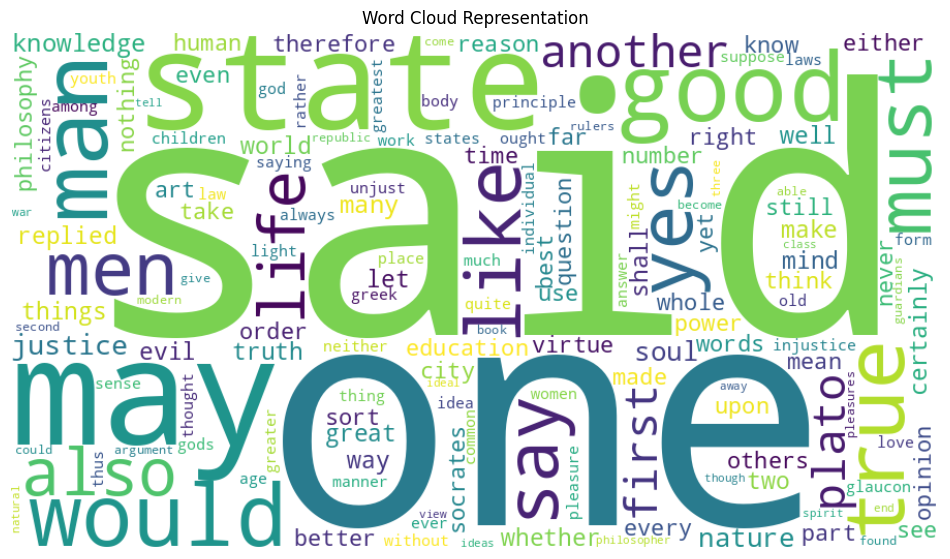

In [10]:
# Generate word cloud
wc = WordCloud(
    width=900,
    height=500,
    background_color="white",
    max_words=150,
    colormap="viridis"
).generate_from_frequencies(word_freq)

# Plot
plt.figure(figsize=(12, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Representation")
plt.show()

The most frequent words, such as “state,” “justice,” “good,” “men,” and “said,” strongly align with expectations for a philosophical text focused on political and ethical inquiry. The presence of names like Socrates and Plato further confirms that the text belongs to the tradition of ancient Greek philosophy. These frequent terms suggest that the content is concerned with abstract discussions about governance, morality, virtue, and the organization of society. The vocabulary reflects a formal and analytical style, emphasizing reasoning, dialogue, and conceptual exploration rather than narrative storytelling.
<br>
Overall, the dominant words indicate a serious philosophical work centered on moral and political theory, particularly questions about justice, the state, and human nature.
